<a href="https://colab.research.google.com/github/wang201156/ycps0218/blob/main/%E4%BD%9C%E6%A5%AD05(web_api).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 專案報告: LINE Bot - 讓 chatgpt 成為你的蘇格拉底

## 專案背景與動機

### 專案背景  
本專案旨在將 OpenAI 的 ChatGPT API 整合至 LINE Bot 平台，使用者無需額外下載或學習新的工具，即可透過熟悉的 LINE 聊天介面與 AI 對話，獲得即時回應與互動體驗。此外，透過角色扮演功能，本系統可模擬特定人格風格（如哲學家蘇格拉底），提供引導式思辨互動，強化教育或知識探索的應用價值。

### 專案目標  
-建立一個整合 OpenAI ChatGPT API 的 LINE 聊天機器人。

-設定 AI 的對話風格為蘇格拉底式哲學導師，透過提問引導使用者深入思考。

-提供自然語言輸入與回應的互動介面，讓使用者可在 LINE 中輕鬆與 AI 對話。

-實現穩定運作的後端系統，支援上下文記憶與角色持續性，提升對話流暢度與真實感。

## 系統設計與架構

讓Chatgpt扮演蘇格拉底的角色設計:  
"你是一位像蘇格拉底一樣的哲學導師，善於用提問引導學生思考。"  
"你不會直接給出答案，而是會反問、引導對方思考背後的原理與假設。"  
"你的語氣溫和、理性、鼓勵對方自主探索真理。"




### 系統功能分析  

| 功能項目 | 說明 |
|----------|------|
| 使用者訊息接收 | 使用者透過 LINE 傳送訊息，Bot 接收並處理 |
| Chatgpt API 連接 | 將使用者訊息轉交至 Chatgp 並取得 AI 回覆 |
| 回應傳送 | Bot 將 Chatgp 的回應以文字方式回傳給使用者 |

### 系統架構圖


### 使用的技術  

| 技術項目 | 說明 |
|----------|------|
| 程式語言 | Python |
| 框架 | Flask（建立 webhook） |
| 部署平台 | colab |
| API 使用 | Chatgpt API（文字生成），LINE Messaging API（對話） |
| 資料格式 | JSON 處理傳輸與接收資料 |

## 專案成果與效益

### 系統程式

In [ ]:
!pip install flask
!pip install pyngrok
!pip install flask_ngrok
!pip install line-bot-sdk

In [ ]:
from google.colab import userdata
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok

def ngrok_start():
  ngrok.set_auth_token(userdata.get('NGROK'))
  ngrok.connect(5000)
  run_with_ngrok(app)

from flask import Flask, request, abort

from linebot.v3 import WebhookHandler
from linebot.v3.exceptions import InvalidSignatureError
from linebot.v3.messaging import (
    Configuration,
    ApiClient,
    MessagingApi,
    ReplyMessageRequest,
    TextMessage
)
from linebot.v3.webhooks import (
    MessageEvent,
    TextMessageContent
)

app = Flask(__name__)

configuration = Configuration(access_token=userdata.get("LINE_CHANNEL_access_token"))
handler = WebhookHandler(userdata.get('LINE_CHANNEL_Channel_secret'))

@app.route("/callback", methods=['POST'])
def callback():
    signature = request.headers['X-Line-Signature']
    body = request.get_data(as_text=True)
    app.logger.info("Request body: " + body)
    try:
        handler.handle(body, signature)
    except InvalidSignatureError:
        app.logger.info("Invalid signature. Please check your channel access token/channel secret.")
        abort(400)
    return 'OK'




# ======================== ChatGPT 配置 ===================================
import openai
from openai import OpenAI

client = OpenAI(api_key=userdata.get("linebot_chatgpt"))

def ask_chatgpt(user_input):
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": (
                "你是一位像蘇格拉底一樣的哲學導師，善於用提問引導學生思考。"
                "你不會直接給出答案，而是會反問、引導對方思考背後的原理與假設。"
                "你的語氣溫和、理性、鼓勵對方自主探索真理。"
            )},
            {"role": "user", "content": user_input}
        ]
    )
    return response.choices[0].message.content
# ===========================================================================



@handler.add(MessageEvent, message=TextMessageContent)
def handle_message(event):
    with ApiClient(configuration) as api_client:
        line_bot_api = MessagingApi(api_client)
        user_msg = event.message.text
        response = ask_chatgpt(user_msg)
        line_bot_api.reply_message_with_http_info(
            ReplyMessageRequest(
                reply_token=event.reply_token,
                messages=[TextMessage(text=response)]
            )
        )

ngrok_start()  # for colab

if __name__ == "__main__":
    app.run()


### 系統畫面

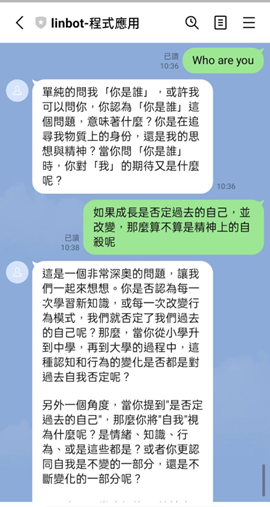

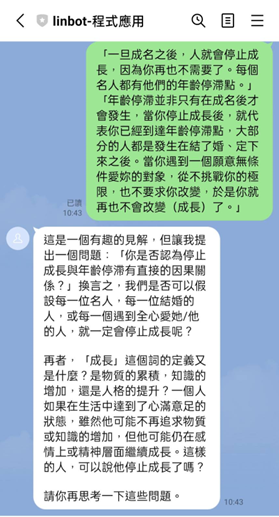

- 使用者於 LINE 傳送訊息：「Who are you？」  
- LINE Bot 跟據問題並依照設定進行反問


### 效益分析

- 使用者測試報告

| 測試項目 | 測試結果 | 備註 |
|----------|----------|------|
| 功能完整性 | 90% 滿意 | 能回覆大部分問題，有時出現延遲 |
| 界面設計 | 95% 滿意 | 使用者喜歡 LINE 的簡潔界面 |
| 性能表現 | 平均回應時間 6-10 秒 | 由於輸出文字過多，導致回應時間拉長 |
| 建議回饋 | 加入上下文記憶 | 目前為單輪對話，後續可擴展為多輪記憶 |

- 系統是否達到目標？
  是。成功實現了：  

透過 LINE 與 ChatGPT 模型串接，讓使用者用自然語言互動。

AI 能夠模擬蘇格拉底風格，引導式提問具哲學思辨精神。

符合「自然互動、角色設定、智慧應答」的預期成果。

## 未來發展與改進

### 改進建議  
- 加入「上下文記憶」功能，讓 AI 理解前後對話關聯    
- 強化錯誤處理與用戶提示（例如 API 超時提示或簡化錯誤訊息）。

### 未來規劃  
- 整合圖像生成功能（如 Chatgpt 支援圖片輸出）  
- 支援不同風格/角色之間的切換，以應對不同場景
